# Resampling Methods

## Cross Validation 

In machine learning, it is a common practice to split your data into two different sets. These two sets are the training set and the testing set. As the name suggests, the training set is used for training the model and the testing set is used for testing the accuracy of the model.In this tutorial, we will:While training a machine learning model we are trying to find a pattern that best represents all the data points with minimum error. While doing so, two common errors come up. These are overfitting and underfitting.

If a given model does not perform well on the validation set then it’s gonna perform worse when dealing with real live data. This notion makes Cross-Validation probably one of the most important concepts of machine learning which ensures the stability of our model.

Cross-Validation is just a method that simply reserves a part of data from the dataset and uses it for testing the model(Validation set), and the remaining data other than the reserved one is used to train the model.

## Dataset Information

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

Attribute Information:

- ID number
- Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Some Important Concepts

- Overfitting : 
    Overfitting occurs when a statistical model or machine learning algorithm captures the noise of the data. Intuitively, overfitting occurs when the model or the algorithm fits the data too well. Overfitting a model result in good accuracy for training data set but poor results on new data sets. Such a model is not of any use in the real world as it is not able to predict outcomes for new cases.
    
    
- Underfitting :
    Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data. Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough. Underfitting is often a result of an excessively simple model. By simple we mean that the missing data is not handled properly, no outlier treatment, removing of irrelevant features or features which do not contribute much to the predictor variable.

## Let's first see why we should use cross validation

- It helps us with model evaluation finally determining the quality of the model.

- Crucial to determining if the model is generalizing well to data.

- To check if the model is overfitting or underfitting.

- Finally, it lets us choose the model which had the best performance.


## There are many types of cross-validation techniques

1. Leave one out cross validation
2. K-fold cross validation
3. Stratified K-fold cross validation
4. Time series cross validation







### Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv('breast-cancer.csv')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())

Any missing data or NaN in the dataset: False


C:\Users\TEJAS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

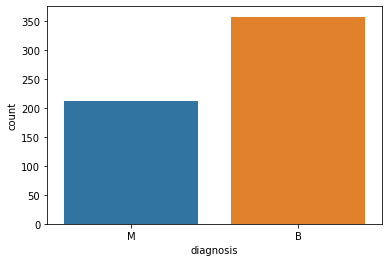

In [6]:
#Visualize the count
sns.countplot(dataset['diagnosis'],label='count')

In [7]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
dataset.iloc[:,1] = labelencoder_Y.fit_transform(dataset.iloc[:,1].values)
dataset.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [2]:
#Get the correlation of the columns
#dataset.iloc[:, 1:12].corr()

In [1]:
#Visualize the correlation
#plt.figure(figsize=(12,12))
#sns.heatmap(dataset.iloc[:,1:12].corr(), annot=True, fmt='.0%')

In [10]:
#Split the dataset into independent (X) and dependent (Y) datasets
X=dataset.iloc[:,2:31].values
Y=dataset.iloc[:, 1].values



In [11]:
#Split the dataset into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

In [12]:
#Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [13]:
#Create a function for the models

def models(X_train, Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
    forest.fit(X_train, Y_train)
        
    #Print the model accuracy on the training data
    print('[0]Logistic Regression Training Accuracy :', log.score(X_train, Y_train))
    print('[1]Decision Tree Classifier Training Accuracy :', tree.score(X_train, Y_train))
    print('[2]Random Forest Classifier Training Accuracy :', forest.score(X_train, Y_train))
        
    return log, tree, forest
    

In [14]:
#Getting all of the models
model=models(X_train, Y_train)

[0]Logistic Regression Training Accuracy : 0.9906103286384976
[1]Decision Tree Classifier Training Accuracy : 1.0
[2]Random Forest Classifier Training Accuracy : 0.9953051643192489


In [15]:
#Test model accuracy on test data on confusion matrix

from sklearn.metrics import confusion_matrix

for i in range (len(model) ):
    print('Model' , i)
    cm = confusion_matrix(Y_test, model[i].predict(X_test))

    True_Positive = cm[0][0]
    True_Negative = cm[1][1]
    False_Negative = cm[1][0]
    False_Positive = cm[0][1]

    print(cm)
    print('Testing Accuracy = ',(True_Positive+True_Negative)/(True_Positive+True_Negative+False_Negative+False_Positive))
    print()

Model 0
[[86  4]
 [ 3 50]]
Testing Accuracy =  0.951048951048951

Model 1
[[83  7]
 [ 2 51]]
Testing Accuracy =  0.9370629370629371

Model 2
[[87  3]
 [ 2 51]]
Testing Accuracy =  0.965034965034965



## Implementing Cross Validation technique

### K-fold Cross Validation

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

If k=5 the dataset will be divided into 5 equal parts and the below process will run 5 times, each time with a different holdout set.






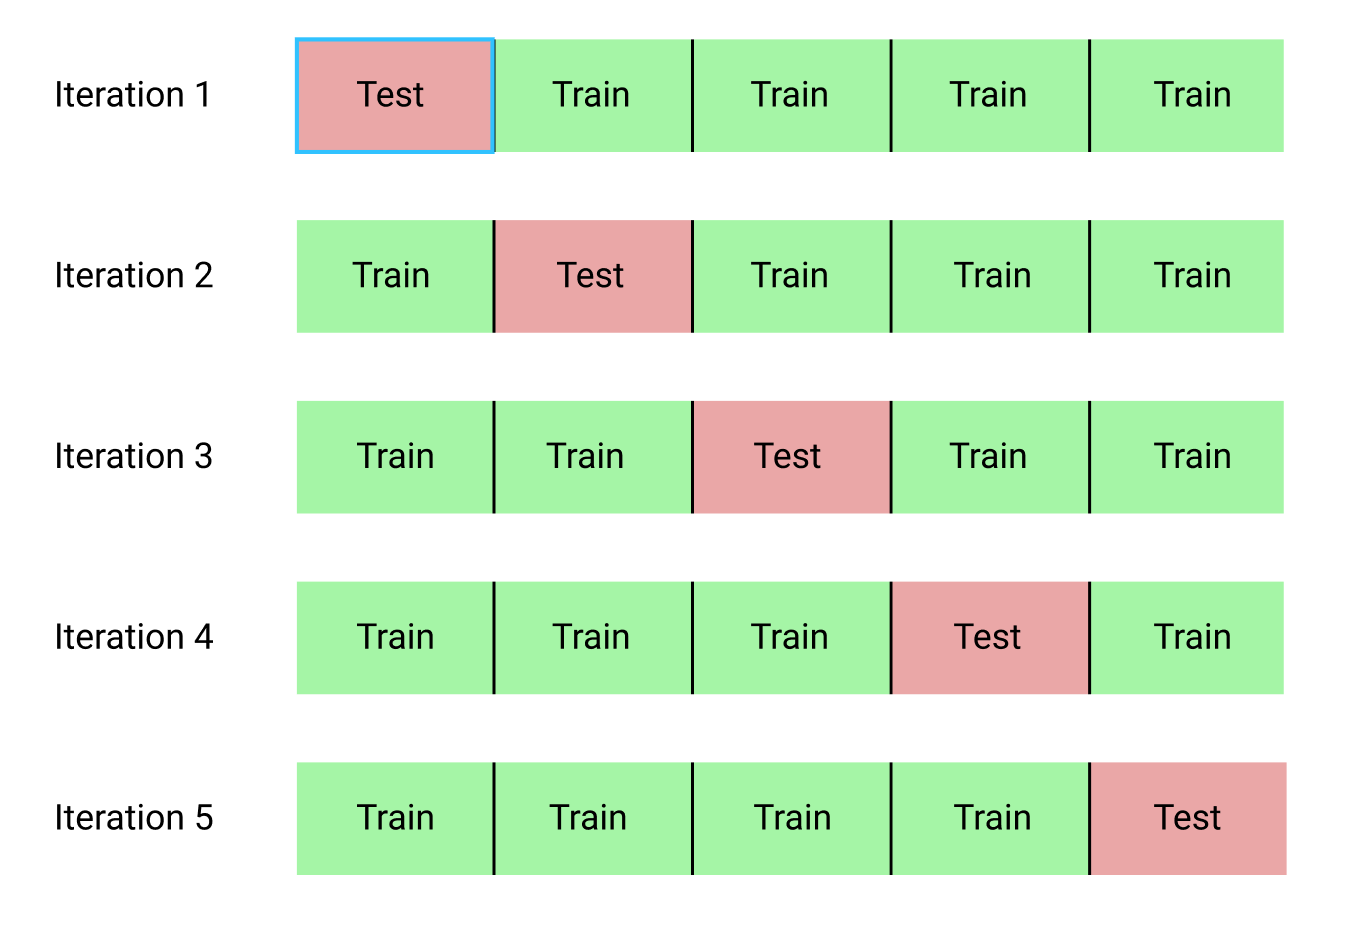

In [17]:
from sklearn.model_selection import cross_val_score,KFold

In [18]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train, Y_train)
    
kf=KFold(n_splits=10)
score=cross_val_score(log,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

C:\Users\TEJAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TEJAS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validation Scores are [0.80701754 0.92982456 0.94736842 0.92982456 0.96491228 0.98245614
 0.98245614 0.96491228 0.9122807  0.96428571]
Average Cross Validation score :0.938533834586466


## Interpretation :
As we see here, after applying cross validation technique we reduce the overfitting and underfitting problem in our model. We create 10 fold in our dataset and here k=10 the dataset will be divided into 10 equal parts and the below process will run 10 times, each time with a different holdout set. (as see in the fig.)

Here, we get the cross validation scores each of 10 folds. We calculate the average of this score and then we consider the average cross validation score for the evaluating the model performance.

Similallarly, we apply the k fold cross validation technique above two ML algorithms i.e. Decisiom tree classifier and Random forest

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)
    
kf=KFold(n_splits=10)
score=cross_val_score(tree,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.9122807  0.9122807  0.87719298 0.96491228 0.89473684 0.98245614
 0.9122807  0.94736842 0.94736842 0.91071429]
Average Cross Validation score :0.9261591478696742


Here, we apply the k fold cross validation technique on Decision Tree Classifier Algorithm. Here, k=10 and the dataset will be divided into 10 equal parts and below process run 10 times. Hence, we get the cross validation scores of each of 10 folds. And, then we calculate the average of all this scores to evaluate the model performance.
The Averahe of all the 10 fold cross validation scores is 0.9261591478696742.


In [20]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, Y_train)
    
kf=KFold(n_splits=10)
score=cross_val_score(forest,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.9122807  0.92982456 0.92982456 0.98245614 0.96491228 0.98245614
 0.96491228 0.98245614 0.96491228 1.        ]
Average Cross Validation score :0.9614035087719298


Here, we apply the k fold cross validation technique on Random Forest Classifier Algorithm. Here, k=10 and the dataset will be divided into 10 equal parts and below process run 10 times. Hence, we get the cross validation scores of each of 10 folds. And, then we calculate the average of all this scores to evaluate the model performance. The Averahe of all the 10 fold cross validation scores is 0.9614035087719298.